In [16]:
from pomegranate import BayesianNetwork, DiscreteDistribution, ConditionalProbabilityTable, Node, State
import matplotlib.pyplot as plt

In [17]:
pain_syndrome = DiscreteDistribution({'yes': .5, 'no': .5})

relief_of_pain = DiscreteDistribution({'yes': 1./3, 'not_completely': 1./3, 'no': 1./3})

angina_pectoris = ConditionalProbabilityTable([
    
    ['yes', 'yes', 'True', 0.9],
    ['yes', 'yes', 'False', 0.1],
    
    ['yes', 'not_completely', 'True', 0.3],
    ['yes', 'not_completely', 'False', 0.7],
    
    ['yes', 'no', 'True', 0.1],
    ['yes', 'no', 'False', 0.9],
    
    ['no', 'yes', 'True', 0.01],
    ['no', 'yes', 'False', 0.99],
    
    ['no', 'not_completely', 'True', 0.01],
    ['no', 'not_completely', 'False', 0.99],
    
    ['no', 'no', 'True', 0.01],
    ['no', 'no', 'False', 0.99],
    
], [pain_syndrome, relief_of_pain])


heart_attack = ConditionalProbabilityTable([
    
    ['yes', 'yes', 'True', 0.1],
    ['yes', 'yes', 'False', 0.9],
    
    ['yes', 'not_completely', 'True', 0.7],
    ['yes', 'not_completely', 'False', 0.3],
    
    ['yes', 'no', 'True', 0.9],
    ['yes', 'no', 'False', 0.1],
    
    ['no', 'yes', 'True', 0.01],
    ['no', 'yes', 'False', 0.99],
    
    ['no', 'not_completely', 'True', 0.01],
    ['no', 'not_completely', 'False', 0.99],
    
    ['no', 'no', 'True', 0.01],
    ['no', 'no', 'False', 0.99],
    
], [pain_syndrome, relief_of_pain])

In [18]:
ps = State(pain_syndrome, name='pain_syndrome')
rp = State(relief_of_pain, name='relief_of_pain')
ap = State(angina_pectoris, name='angina_pectoris')
ha = State(heart_attack, name='heart_attack')

In [19]:
model = BayesianNetwork('Medical decision support system')

model.add_states(ps, rp, ap, ha)

In [20]:
model.add_edge(ps, ap)
model.add_edge(rp, ap)

model.add_edge(ps, ha)
model.add_edge(rp, ha)

In [21]:
model.bake()

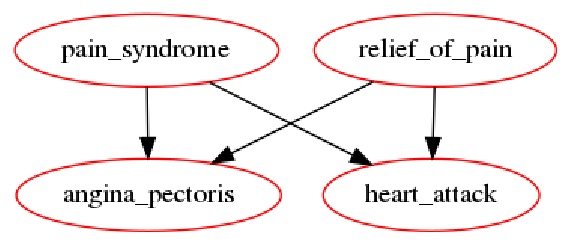

In [22]:
plt.figure(figsize=(10, 10))
model.plot()
plt.show()

In [23]:
def get_predictions(prediction):
    result = []
    for p in prediction:
        if (type(p) is str): 
            result.append(p)
        else:
            params = p.parameters[0]
            result.append(max(params, key=params.get))
    return result

In [24]:
result = model.predict_proba({'pain_syndrome': 'yes', 'relief_of_pain': 'no'})
print(result)
print('\t'.join([state.name for state in model.states]))
print('\t'. join(get_predictions(result)))

['yes' 'no'
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.8999999999999999,
            "True" :0.1000000000000002
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.1000000000000002,
            "True" :0.8999999999999999
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack
yes	no	False	True


In [25]:
result = model.predict_proba({'pain_syndrome': 'yes'})
print(result)
print('\t'.join([state.name for state in model.states]))
print('\t'. join(get_predictions(result)))

['yes'
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "yes" :0.3333333333333334,
            "not_completely" :0.3333333333333331,
            "no" :0.3333333333333334
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.5666666666666665,
            "True" :0.4333333333333334
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.4333333333333333,
            "True" :0.5666666666666665
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack
yes	yes	False	True


In [26]:
result = model.predict_proba({'pain_syndrome': 'yes', 'relief_of_pain': 'not_completely'})
print(result)
print('\t'.join([state.name for state in model.states]))
print('\t'. join(get_predictions(result)))

['yes' 'not_completely'
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.6999999999999998,
            "True" :0.30000000000000004
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "False" :0.30000000000000004,
            "True" :0.6999999999999998
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack
yes	not_completely	False	True
